# 필요한 라이브러리 불러오기

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns  
import matplotlib.pyplot as plt

# 데이터 전처리

In [4]:
# 2020 년 데이터 불러와서 정제하기
month = ["01","02","03","04","05","06","07","08","09","10","11","12"]
for i in range(0,12): # i는 0부터 11까지
  _month = month[i]
  df = pd.read_csv('/content/drive/MyDrive/Raw Data/2020/2020'+_month+'_uv.csv')
  band1 = df['2020'+_month+'_uv.band1']
  print("-"*100)
  print("< "+str(i+1)+" 월 >")
  drop_list = []
  print(len(df))

  # band1의 이상치 라인 삭제
  for j in range(0,len(df)):
    
    if band1[j] == -999 :
      drop_list.append(j)
  print(len(drop_list))
  new_df = df.drop(drop_list)
  new_df = new_df.drop('Unnamed: 0',axis=1)
  new_df = new_df.reset_index()

  # uv의 결측치 및 이상치 변경
  uv = new_df['2020'+_month+'_uv.uv']
  for k in range(0,len(new_df)):
    if k>0 and k < len(new_df)-1:
      if uv[k] >=0:
        continue
      else: 
        # uv: -999가 이고 위아래 정상적인 값이 존재할 때
        if uv[k-1]>=0 and uv[k+1]>=0:
          mean = (uv[k-1]+uv[k+1])/2
          new_df.loc[k, '2020'+_month+'_uv.uv'] = mean
        # uv: 연속적인 -999가 일 때
        else:
          if uv[k-1]>=0:
            index = k 
            while True:
              index+=1
              # + 가 나타나는 곳이 있으면 break
              if uv[index]>=0:
                break
            mean = (uv[k-1]+uv[index])/2
            new_df.loc[k, '2020'+_month+'_uv.uv'] = mean
          else:
            print(k) # k로 출력되는 게 없는 걸 보아하니 코드가 잘 동작하는 군
  
  # 필요없는 칼럼 제거
  new_df = new_df.drop(new_df.columns[[0,4,5,10,11,12,22,24,26,27]], axis = 1)
  new_columns = []
  # 칼럼명에 연도+월 붙어있는 거 제거
  for i in new_df.columns:
    new_columns.append(i.split(".")[1])
  new_df.columns=new_columns
  # Meta Data 폴더에 넣어주기
  new_df.to_csv('/content/drive/MyDrive/Meta Data/2020/2020'+_month+'_uv.csv',index = False)


----------------------------------------------------------------------------------------------------
< 1 월 >
66960
2220
----------------------------------------------------------------------------------------------------
< 2 월 >
62640
465
----------------------------------------------------------------------------------------------------
< 3 월 >
66960
945
----------------------------------------------------------------------------------------------------
< 4 월 >
64800
930
----------------------------------------------------------------------------------------------------
< 5 월 >
66960
480
----------------------------------------------------------------------------------------------------
< 6 월 >
64800
465
----------------------------------------------------------------------------------------------------
< 7 월 >
66960
495
----------------------------------------------------------------------------------------------------
< 8 월 >
66960
660
-----------------------------------------------

## 정제한 데이터들 합치기

In [5]:
import os
df_all = pd.DataFrame()
year = 2020
for k in range(2):
  forders = os.listdir('/content/drive/MyDrive/Meta Data/'+str(year)+'/')
  for i in range(0,len(forders)):
      if forders[i].split('.')[1] == 'csv':
          file = '/content/drive/MyDrive/Meta Data/'+str(year)+'/'+forders[i]
          df= pd.read_csv(file,encoding='utf-8')
         
          df_all = pd.concat([df_all, df],ignore_index=True)
  year+=1
  
print(df_all)



         yyyymmdd  hhnn  stn        lon       lat   uv    band1    band2  \
0        20201101     0   13  126.16000  33.30000  0.0  0.00170  0.00171   
1        20201101     0  105  128.89098  37.75147  0.0  0.00057  0.00114   
2        20201101     0  108  126.96500  37.57100  0.0  0.00113  0.00114   
3        20201101     0  112  126.62490  37.47772  0.0  0.00113  0.00171   
4        20201101     0  115  130.89864  37.48129  0.0  0.00113  0.00057   
...           ...   ...  ...        ...       ...  ...      ...      ...   
1560895  20210930  2350  146  127.11900  35.84080  0.1 -0.00057 -0.00057   
1560896  20210930  2350  152  129.33472  35.58250  0.0 -0.00057  0.00000   
1560897  20210930  2350  156  126.89158  35.17294  0.0 -0.00057 -0.00057   
1560898  20210930  2350  159  129.03203  35.10468  0.0  0.00000  0.00000   
1560899  20210930  2350  165  126.38121  34.81689  0.0  0.00000  0.00000   

           band3    band4  ...     band12     band13     band14     band15  \
0        

In [6]:
df_all.isnull().sum() #결측값이 있는지?

yyyymmdd    0
hhnn        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateze      0
esr         0
height      0
landtype    0
dtype: int64

In [7]:
df_all.isin([-999.0]).sum() 

yyyymmdd    0
hhnn        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateze      0
esr         0
height      0
landtype    0
dtype: int64

In [8]:
df_all['stn'].value_counts()

13     104060
105    104060
108    104060
112    104060
115    104060
131    104060
132    104060
133    104060
138    104060
143    104060
146    104060
152    104060
156    104060
159    104060
165    104060
Name: stn, dtype: int64

In [10]:
df_corr = df_all[df_all.columns[0:]].corr()

In [11]:
df_corr

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateze,esr,height,landtype
yyyymmdd,1.000000e+00,-8.563034e-04,2.583357e-14,2.629009e-13,8.239416e-13,0.003901,-0.005480,-0.005064,-0.003843,-0.003059,...,0.005478,0.006695,0.003662,0.000587,-0.002772,0.003418,-1.357005e-13,-0.003102,3.639303e-14,3.922003e-14
hhnn,-8.563034e-04,1.000000e+00,7.293435e-17,1.225344e-16,5.820363e-16,0.046193,0.045628,0.044930,0.044296,0.046816,...,0.046456,0.041493,0.038986,0.034208,0.024441,-0.127593,-1.246367e-15,0.201452,1.555023e-17,-6.773686e-17
stn,2.583357e-14,7.293435e-17,1.000000e+00,2.226731e-01,1.490523e-01,0.004114,0.002084,0.003292,0.007303,0.013006,...,-0.014808,-0.004065,-0.003393,-0.001463,-0.002559,0.000044,1.433021e-01,-0.000034,-1.386348e-01,3.869078e-01
lon,2.629009e-13,1.225344e-16,2.226731e-01,1.000000e+00,3.026817e-01,0.005142,-0.006473,-0.006908,-0.001790,0.001187,...,-0.025434,-0.006733,-0.007204,-0.006759,-0.015615,0.000106,3.051878e-01,-0.000083,4.137514e-01,2.486516e-01
lat,8.239416e-13,5.820363e-16,1.490523e-01,3.026817e-01,1.000000e+00,-0.019702,-0.008260,-0.009608,-0.006736,-0.003905,...,-0.096965,-0.023795,-0.021349,-0.018744,-0.037837,0.000273,9.998272e-01,-0.000174,2.234999e-01,4.142433e-01
uv,3.901295e-03,4.619317e-02,4.113715e-03,5.142258e-03,-1.970212e-02,1.000000,0.440206,0.420096,0.378186,0.451669,...,0.315373,0.300756,0.285175,0.258397,0.225276,-0.720950,-1.974649e-02,0.696888,2.264348e-04,-4.855481e-03
band1,-5.480052e-03,4.562785e-02,2.083579e-03,-6.473108e-03,-8.259697e-03,0.440206,1.000000,0.998935,0.983771,0.986069,...,-0.155426,-0.201408,-0.206934,-0.216075,-0.212406,-0.720857,-8.364616e-03,0.713225,-5.419730e-03,3.021497e-03
band2,-5.064468e-03,4.492966e-02,3.292001e-03,-6.907597e-03,-9.608071e-03,0.420096,0.998935,1.000000,0.988260,0.988758,...,-0.168439,-0.216142,-0.221424,-0.230003,-0.224547,-0.703271,-9.753102e-03,0.695023,-6.952441e-03,3.704857e-03
band3,-3.842874e-03,4.429552e-02,7.303064e-03,-1.790200e-03,-6.735863e-03,0.378186,0.983771,0.988260,1.000000,0.985385,...,-0.190464,-0.239817,-0.244525,-0.251800,-0.243405,-0.664084,-6.937900e-03,0.654856,-6.886728e-03,9.430368e-03
band4,-3.059430e-03,4.681641e-02,1.300594e-02,1.187418e-03,-3.905320e-03,0.451669,0.986069,0.988758,0.985385,1.000000,...,-0.145644,-0.194255,-0.200561,-0.210364,-0.205996,-0.709940,-4.389647e-03,0.699835,-1.202215e-02,2.371853e-02


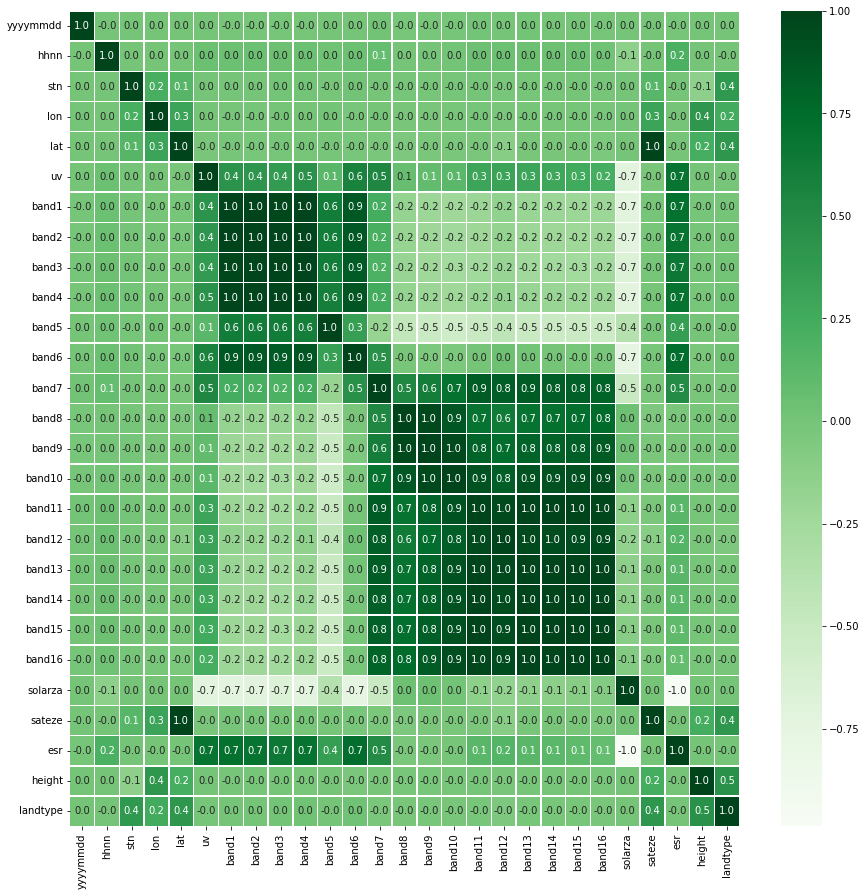

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_corr, annot=True, 
fmt = '.1f', linewidths=.5, cmap='Greens') #data = data.corr()

# 데이터 정규화

1. train data 정규화

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['band1', 'band2', 'band3','band4','band6', 'band7', 'band11', 'band12', 'band13','band14','solarza','esr'] # 절댓값 0.3 이상인 값들만 

df_scaled = scaler.fit_transform(df_all[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,band1,band2,band3,band4,band6,band7,band11,band12,band13,band14,solarza,esr
0,0.011237,0.011239,0.011826,0.012241,0.020493,0.814367,0.818518,0.543380,0.815616,0.823865,0.939061,0.026147
1,0.010262,0.010751,0.011561,0.011099,0.018710,0.694739,0.607623,0.356060,0.595370,0.574726,0.916200,0.038293
2,0.010745,0.010751,0.011561,0.011610,0.019608,0.628290,0.554678,0.316544,0.542360,0.548051,0.914992,0.038707
3,0.010745,0.011239,0.011561,0.010971,0.019608,0.634673,0.542461,0.310193,0.529580,0.528813,0.915158,0.038568
4,0.010745,0.010263,0.011826,0.011483,0.019608,0.746737,0.681755,0.396983,0.667644,0.662378,0.919315,0.036857
...,...,...,...,...,...,...,...,...,...,...,...,...
1560895,0.009279,0.009286,0.011561,0.010332,0.017826,0.818324,0.838878,0.533323,0.825345,0.839204,0.849429,0.112958
1560896,0.009279,0.009774,0.010512,0.010715,0.017826,0.812641,0.827581,0.531410,0.813223,0.825280,0.854154,0.106313
1560897,0.009279,0.009286,0.009727,0.010332,0.016928,0.826750,0.848112,0.546014,0.834632,0.848341,0.853051,0.110670
1560898,0.009771,0.009774,0.009727,0.010843,0.016928,0.826485,0.845898,0.547328,0.832068,0.842915,0.856671,0.104956


(0.0, 50000.0)

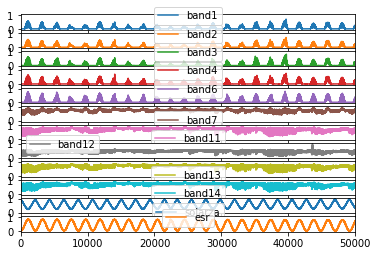

In [22]:
df_scaled.plot(subplots=True)
plt.xlim([0, 50000])  

2. test data 정규화

In [16]:
# 테스트 데이터 정규화
df = pd.read_csv('/content/drive/MyDrive/Validation Data/201908_uv_with_all_columns.csv')
df_scaled_test = scaler.fit_transform(df[scale_cols])
df_scaled_test = pd.DataFrame(df_scaled_test)
df_scaled_test.columns = scale_cols

df_scaled_test

,band1,band2,band3,band4,band6,band7,band11,band12,band13,band14,solarza,esr
0,0.009279,0.009774,0.011480,0.010554,0.013726,0.776255,0.860984,0.840786,0.854071,0.855130,0.911782,0.084557
1,0.009771,0.009286,0.010334,0.010554,0.013726,0.779785,0.858627,0.819899,0.849266,0.846993,0.880805,0.116726
2,0.009771,0.009286,0.011769,0.011516,0.013726,0.547595,0.645998,0.592574,0.641147,0.637025,0.879371,0.117872
3,0.009771,0.009286,0.010903,0.011516,0.013726,0.382422,0.451454,0.385844,0.437800,0.436088,0.879678,0.117486
4,0.009279,0.009286,0.010045,0.010417,0.013726,0.767209,0.857840,0.821540,0.849826,0.852778,0.885286,0.112426
...,...,...,...,...,...,...,...,...,...,...,...,...
65484,0.010262,0.010263,0.012049,0.011928,0.014699,0.670731,0.735676,0.680906,0.726956,0.712898,0.968865,0.054298
65485,0.010262,0.009774,0.012627,0.011379,0.014699,0.630241,0.686529,0.633800,0.677922,0.655252,0.975030,0.045428
65486,0.010262,0.010263,0.011480,0.011791,0.014699,0.678261,0.747076,0.690815,0.733646,0.735344,0.973628,0.050641
65487,0.010262,0.010263,0.012338,0.012066,0.014699,0.451424,0.483959,0.410955,0.463601,0.456067,0.978302,0.043181


(0.0, 50000.0)

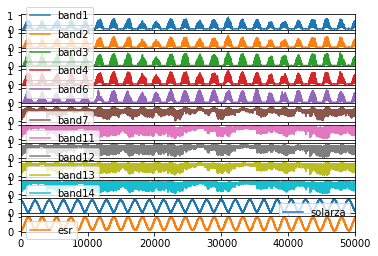

In [17]:
df_scaled_test.plot(subplots=True)
plt.xlim([0, 50000])

In [21]:
# 3차원으로 재구성하기
X_train = df_scaled.values
X_train_t = X_train.reshape(X_train.shape[0], X_train.shape[1],1) # 데이터셋 수, 칼럼 수, 1

X_test = df_scaled_test.values
X_test_t = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

y_train = df_all['uv'].values
y_test = df['uv'].values


# 모델 학습시키기

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

# LSTM 아키텍처 (architecture)
model = Sequential()
model.add(LSTM(units = 50, input_shape=(len(scale_cols), 1), activation='relu')) 
model.add(Dense(1))

# 컴파일링
model.compile(optimizer='adam', loss='mse')

# training data 세트에 피팅하기
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)
model.fit(X_train_t, y_train, epochs = 10, batch_size = 150, verbose = 1, callbacks=[early_stop])


Epoch 1/10
10406/10406 [==============================] - 107s 10ms/step - loss: 0.4293
Epoch 2/10
10406/10406 [==============================] - 103s 10ms/step - loss: 0.2870
Epoch 3/10
10406/10406 [==============================] - 111s 11ms/step - loss: 0.2628
Epoch 4/10
10406/10406 [==============================] - 118s 11ms/step - loss: 0.2523
Epoch 5/10
10406/10406 [==============================] - 113s 11ms/step - loss: 0.2457
Epoch 6/10
10406/10406 [==============================] - 107s 10ms/step - loss: 0.2415
Epoch 7/10
10406/10406 [==============================] - 105s 10ms/step - loss: 0.2391
Epoch 8/10
10406/10406 [==============================] - 105s 10ms/step - loss: 0.2372
Epoch 9/10
10406/10406 [==============================] - 103s 10ms/step - loss: 0.2354
Epoch 10/10
10406/10406 [==============================] - 102s 10ms/step - loss: 0.2339


# 값 예측하기

In [26]:
#X_test_t를 LSTM 모델에 넣어서 예측하기
y_pred = model.predict(X_test_t)




2047/2047 [==============================] - 5s 2ms/step


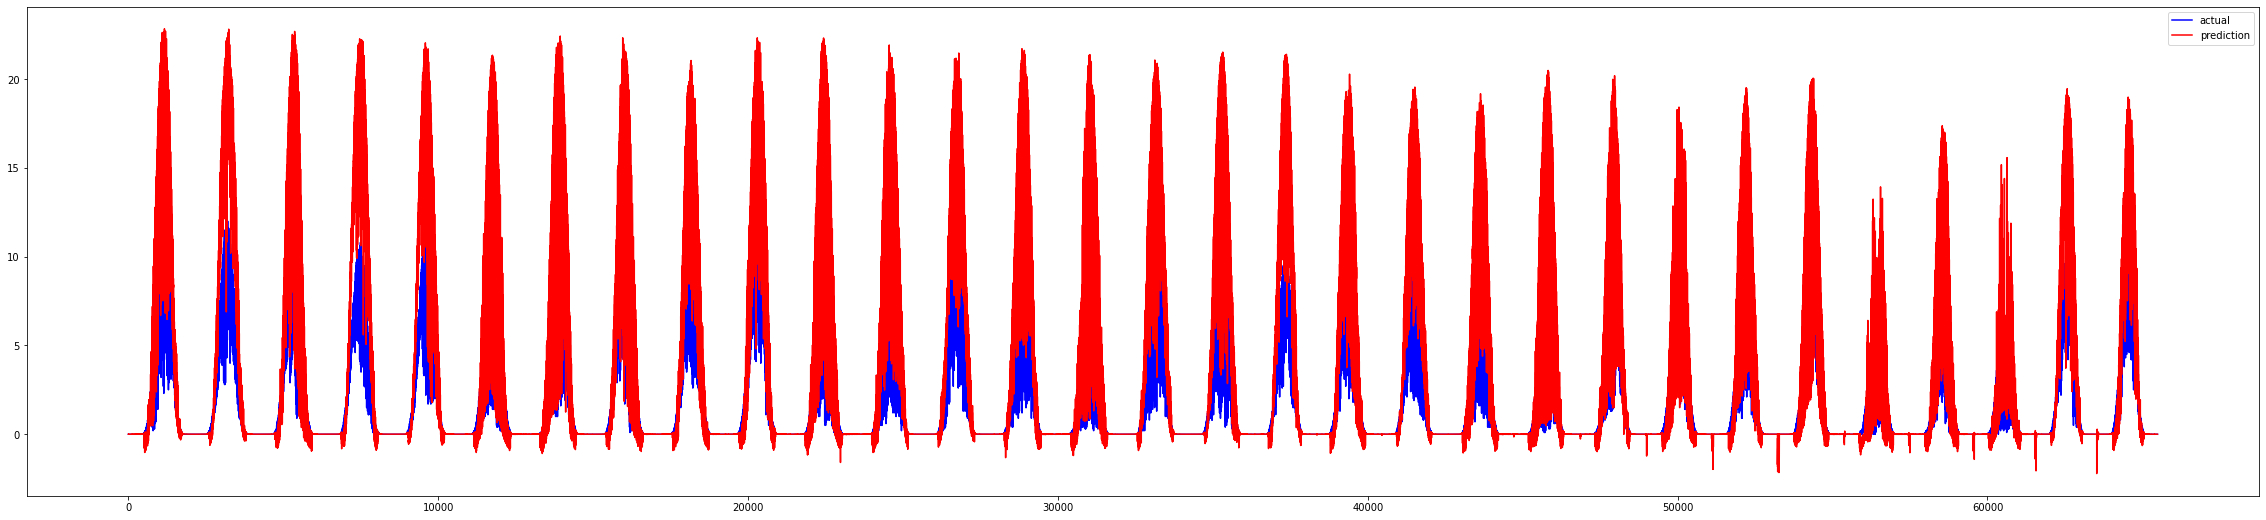

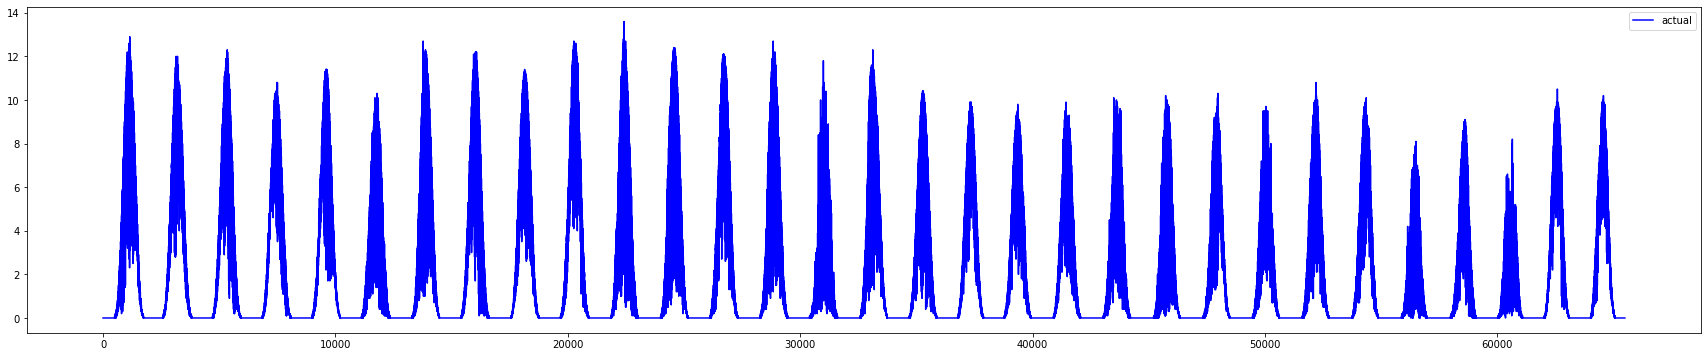

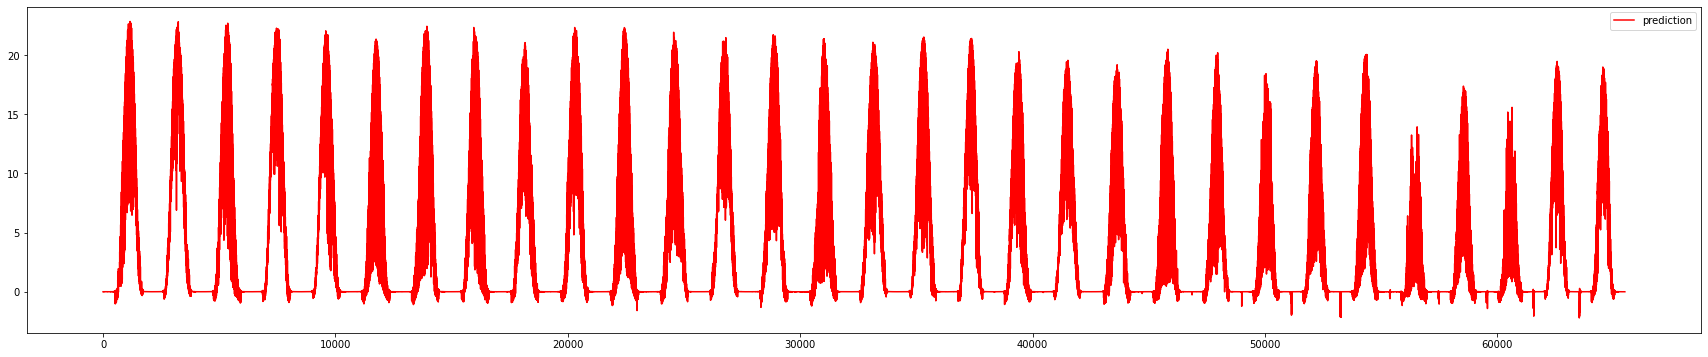

In [27]:
# print('accuracy : {:2%}'.format(np.mean(y_pred == y_test)))
plt.figure(figsize=(40, 9))
plt.plot(y_test, 'b', label = 'actual')
plt.plot(y_pred, 'r', label = 'prediction')
plt.legend()
plt.show()

# 따로 보기
plt.figure(figsize = (30,6)) # Plotting
plt.plot(y_test, 'b', label = 'actual')
plt.legend()
plt.show()
plt.figure(figsize=(30, 6))
plt.plot(y_pred, 'r', label = 'prediction')
plt.legend()
plt.show()

# 성능 평가하기

In [28]:
# 성능 평가하기
DIFF = 0.2 # 오차범위
predict_value = pd.DataFrame(y_pred)
real_value = pd.DataFrame(y_test)
result = pd.concat([real_value, predict_value],axis = 1)
result.columns = ['real','predict']
count = 0
for i in range(len(result)):
  if abs(result['real'][i] - result['predict'][i]) <= DIFF:
    count+=1
TP = round(count/len(result),3)
print("오차 범위",DIFF,"일 때 TP 값:",TP)

오차 범위 0.2 일 때 TP 값: 0.518
